# k-Nearest Neighbors

The <b>kNN or k-nearest neighbor algorithm</b> is a supervised learning algorithm used for <i>classification</i> and <i>regression</i>. The kNN classifier is a <b>non parametric</b> and <b>instance-based</b> learning algorithm.

The kNN algorithm is among the simplest of all machine learning algorithms. Despite its simplicity, kNN can outperform more powerful classifiers and is used in a variety of applications such as economic forecasting, data compression and genetics.

In the classification setting, the kNN algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. 

The k is a hyperparameter that helps in classifying a data point accurately and needs to be chosen. More, precisely, the k is the number of nearest neighbors you wish to take a vote from when classifying a new data point. Or, one can think of K as controlling the shape of the decision boundary.

When K is small, we are restraining the region of a given prediction and forcing our classifier to be “more blind” to the overall distribution. A small value for K provides the most flexible fit, which will have low bias but high variance.

## Exploring kNN with Sklearn

We consider <i>Iris data set</i> consists of 150 samples having three classes: <i>Iris setosa, Iris virginica and Iris versicolor</i>. Four features/attributes contribute to uniquely identifying as one of the three classes are <i>sepal-length, sepal-width, petal-length and petal-width.</i> See the difference between three flowers in the picture.

Our goal is to train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.

![title](iris.jpg)

In [64]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

data = load_iris().data
data.shape

(150, 4)

Each class has 50 samples each. Let's extract the class labels and concatenate the data.

In [53]:
labels = load_iris().target
labels = np.reshape(labels,(150,1))

In [54]:
data = np.concatenate([data,labels],axis=-1)
data.shape

(150, 5)

We will arrange our data in a tabular fashion and perform some operations on it. 

In [55]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pd.DataFrame(data,columns=names)
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace=True)
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Visualising the data

We visualise the data to see how much one variable is affected by the other variable or, said otherwise, how much correlation is between the two variables.

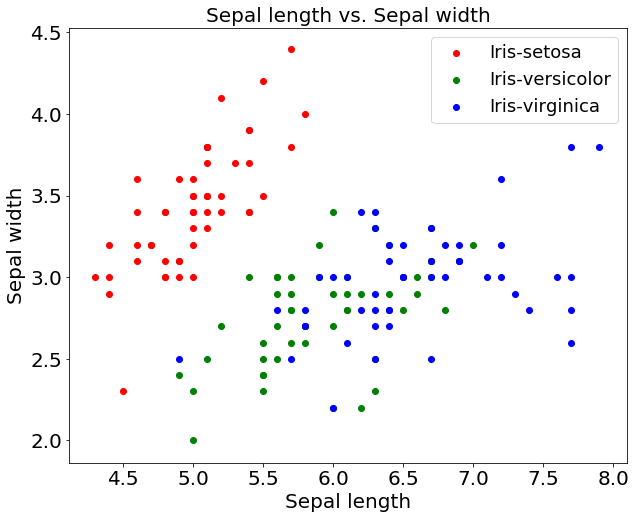

In [56]:
plt.figure(4, figsize=(10, 8))

plt.scatter(data[:50, 0], data[:50, 1], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 0], data[50:100, 1], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 0], data[100:, 1], c='b',label='Iris-virginica')

plt.xlabel('Sepal length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Sepal width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()

It is obvious that there is a high correlation between the <i>Iris setosa</i> w.r.t the sepal length and sepal width. On the other hand, there is less correlation between <i>Iris versicolor and Iris virginica.</i> 

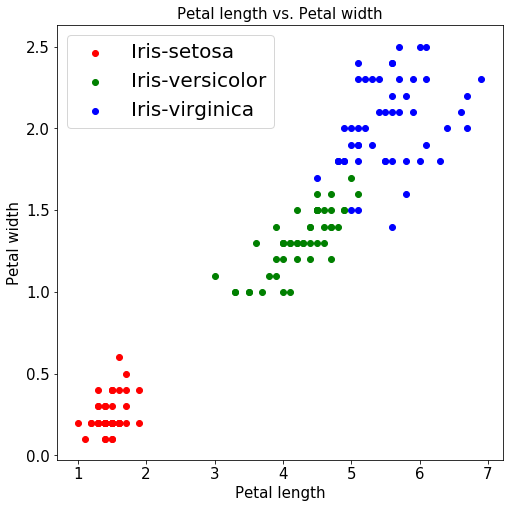

In [38]:
plt.figure(4, figsize=(8, 8))

plt.scatter(data[:50, 2], data[:50, 3], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 2], data[50:100, 3], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 2], data[100:, 3], c='b',label='Iris-virginica')
plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Petal length vs. Petal width',fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

<b> Task:</b> What can you conclude from the above graphs? Can you classify the species?

You can check the correlation between each flower species and features. See example below for <i>Iris Setosa</i>.

In [60]:
dataset.iloc[:50,:].corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.742547,0.267176,0.278098
sepal-width,0.742547,1.000000,0.177700,0.232752
petal-length,0.267176,0.177700,1.000000,0.331630
petal-width,0.278098,0.232752,0.331630,1.000000


<b> Task:</b> Check correlation for other species and discuss.

## The KNN model

<b>Data splitting.</b> You need to split your data first in order to avoid overfitting and train a generalisable model. We will be training the ML model on 80% of the data and the remaining 20% of the data will be used for testing.

<b> Task:</b> Check how the performance of the algorithm will change if you do different training - testing set splitting, e.g., 70 % - 30 %, 60 % - 40 %.

For training and testing set split, we will use in-built splitting function  ```train_test_split```. 

In [40]:
train_data,test_data,train_label,test_label = train_test_split(
    dataset.iloc[:,:3], dataset.iloc[:,4], test_size=0.2, random_state=42)

```random_state``` is a seed that takes a random_state as input if you change the number the split of the data will also change. 

In [41]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((120, 3), (120,), (30, 3), (30,))

<b> K-NN Model </b>. To run kNN we will use inbuilt function ```neighbors``` which has a class called ```KNeigborsClassifier``` in it. We also need to choose the hypoparameter k. 

In order to decide the best value for hyperparameter k, we will do <b>grid-search.</b> We will train and test the model on 10 different k values and finally use the one that gives the best results.

In [42]:
neighbors = np.arange(1,9)
train_accuracy =np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

In [43]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(train_data, train_label)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)

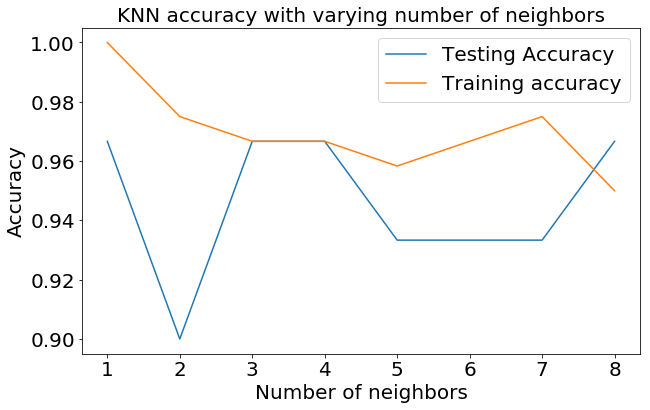

In [44]:
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

What does the graph tell you? What is the optimal value of k?

In [61]:
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

<b>Task: If you have some time and bored....</b> Instead of grid-search run ```cross_val_score ``` for different number of folds and compare the training and testing error.

### Evaluating the model

We will evaluate the model on the testing data using ```confusion_matrix```. Let's first check the accuracy of the model on the testing data.

In [62]:
test_accuracy

0.9666666666666667

In [65]:
prediction = knn.predict(test_data)

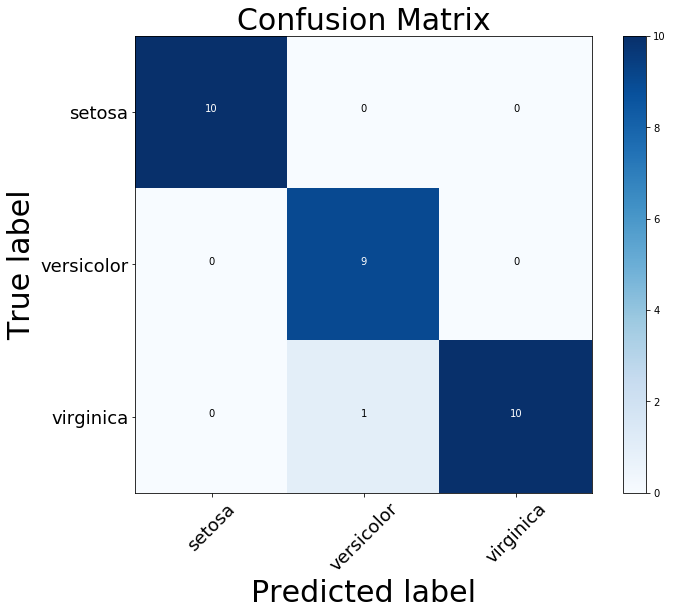

In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
class_names = load_iris().target_names


# Compute confusion matrix
cnf_matrix = confusion_matrix(test_label, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()

<b> Task</b>: discuss the results in small groups.

### Summary:

We observed how kNN can be applied for classification tasks using scikit-learn and how one can choose the hyperparameter.

<b> Task:</b> What are the pros and cons of the kNN?

The notebook is 